# Asbestos? Predicting Houses Before 1980

## Brief Outline

Thoughout this document we are able to look at what features are important in determining whether or not a house was built pre- 1980, and throughout we used important machine learning principals and basics: determining what features to include, what classifier to use, and how we can determine the performance of a model through the use of different metrics.

In [29]:
from types import GeneratorType
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Retrieve Data

In [30]:
denver = pd.read_csv('https://raw.githubusercontent.com/byuidatascience/data4dwellings/master/data-raw/dwellings_denver/dwellings_denver.csv')
ml = pd.read_csv('https://raw.githubusercontent.com/byuidatascience/data4dwellings/master/data-raw/dwellings_ml/dwellings_ml.csv')

## Data Sample
A small example of the data is displayed below.

In [31]:
denver['before1980'] = denver.yrbuilt <= 1980
denver.head()

,parcel,nbhd,abstrprd,livearea,finbsmnt,basement,yrbuilt,condition,quality,totunits,...,arcstyle,sprice,deduct,netprice,tasp,smonth,syear,qualified,status,before1980
0,00102-08-065-065,4,1130,1346,0,0,2004,AVG,C,1,...,MIDDLE UNIT,100000,0,100000,100000,2,2012,Q,I,False
1,00102-08-073-073,4,1130,1249,0,0,2005,AVG,C,1,...,END UNIT,94700,0,94700,94700,4,2011,Q,I,False
2,00102-08-078-078,4,1130,1346,0,0,2005,AVG,C,1,...,MIDDLE UNIT,89500,0,89500,89500,10,2010,Q,I,False
3,00102-08-081-081,4,1130,1146,0,0,2005,AVG,C,1,...,END UNIT,92000,3220,88780,88780,10,2011,Q,I,False
4,00102-08-086-086,4,1130,1249,0,0,2005,AVG,C,1,...,END UNIT,74199,0,74199,74199,3,2012,U,I,False


## Correlation Heatmap

<Axes: >

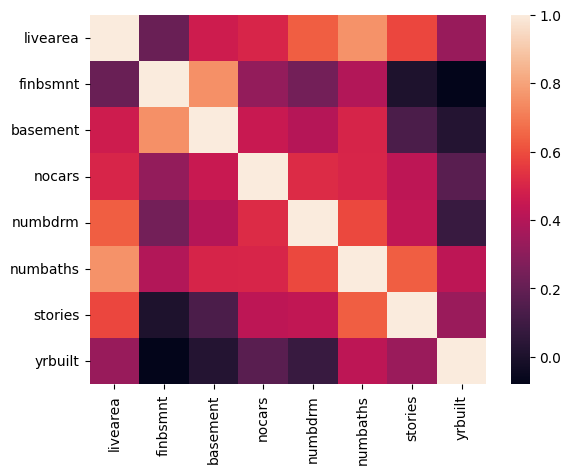

In [32]:
h_subset = ml.filter(['livearea', 'finbsmnt', 
    'basement', 'yearbuilt', 'nocars', 'numbdrm', 'numbaths', 
    'stories', 'yrbuilt', 'before1980']).sample(500)
corr = h_subset.drop(columns = 'before1980').corr()
sns.heatmap(corr)

We can look at the heat map inorder to determine how the different factors are correlated. We want to focus on the 'yrbuilt' column where the colors will show the correlation between 'yrbuilt' and the other factors. In the map we can see that 1.0 shows a position correlation and 0.0 shows no correlation.

## Architecture Style

In [33]:

fig = go.Figure(go.Box(
    x=subset_data.arcstyle,
    y= subset_data.yrbuilt))
fig.update_layout(title= "Architecture Style")
fig.show()


Looking at this boxplot above we can see the distribution of year by the Architectual style. 

## Stories

In [34]:

fig = go.Figure(go.Box(
    x=subset_data.stories,
    y= subset_data.yrbuilt))
fig.update_layout(title= "Stories")
fig.show()

Using the stories chart we can see one story houses were mostly built before the 1980’s and that three story houses and 4 four story houses were largely built after the 1980’s.

## Number of Bathrooms

In [35]:
#testing different columns to look at how they collilate with the columns
#num baths
denver.columns

fig = go.Figure(go.Box(
    x=subset_data.numbaths,
    y= subset_data.yrbuilt))
fig.update_layout(title= "Architecture Style")
fig.show()

Looking at the boxplot above we can depict that the distribution of houses with larger numbers of bathrooms seems to compact and the range of years largely increase.

## Choosen Features

The chosen features are below within the 'ml.filter' method

In [36]:
x = ml.filter(["numbaths",'stories','livearea', 'gartype_None', 'quality_A', 'quality_C', 'quality_D',
       'quality_X', 'status_I', 'condition_Good', 'sprice','arcstyle_ONE-STORY', 
    'arcstyle_CONVERSIONS', 'arcstyle_ONE AND HALF-STORY',
     'gartype_att/CP', 'gartype_det/CP','condition_Excel', 'condition_Fair','condition_AVG',
     'arcstyle_BI-LEVEL', 'arcstyle_CONVERSIONS', 'arcstyle_ONE AND HALF-STORY',
       'arcstyle_ONE-STORY',
       'arcstyle_TRI-LEVEL', 'arcstyle_TRI-LEVEL WITH BASEMENT', 'arcstyle_TWO-STORY','totunits','finbsmnt'])
y = ml.before1980
feature_names = x.columns

## Train Test Split

Split our data into train and test data frames. Display a transformation of the x_train dataset for the machine learning model to read.

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 192)


In [38]:
x_train.head()


,numbaths,stories,livearea,gartype_None,quality_A,quality_C,quality_D,quality_X,status_I,condition_Good,...,condition_AVG,arcstyle_BI-LEVEL,arcstyle_CONVERSIONS,arcstyle_ONE AND HALF-STORY,arcstyle_ONE-STORY,arcstyle_TRI-LEVEL,arcstyle_TRI-LEVEL WITH BASEMENT,arcstyle_TWO-STORY,totunits,finbsmnt
20591,3,2,2200,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
7867,2,1,1118,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,1024
14186,2,2,1468,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
9633,2,1,1041,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
12520,1,1,718,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,196


## Predictive Model

In [39]:
# create the model
classifier = RandomForestClassifier()

# train the model
classifier.fit(x_train, y_train)

# make predictions
y_predictions = classifier.predict(x_test)
y_predictions

array([1, 1, 0, ..., 1, 0, 0])

### Metrics

Looking at the metrics matrix above you can see multiple decimal numbers which represent precents. We are going to focus on precision and recall.

In [40]:
# test how accurate predictions are

print(metrics.classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2140
           1       0.93      0.92      0.93      3589

    accuracy                           0.91      5729
   macro avg       0.90      0.90      0.90      5729
weighted avg       0.91      0.91      0.91      5729



#### Precision

Precision calculates the ability to identify only the relevant data points. So a measure of doing what it’s supposed to do. The number associated with 1 in precision is 0.93 showing use that the model correctly identified the important features 93% of the time.

#### Recall 

Recall is the ability of your model to find all the relevant cases in your model. Showing how many truths were identified out of all the truths that were supposed to be identified.The number associated with 1 in recall is 0.93 showing use that the model correctly identified the relivant features 93% of the time.

In [41]:
#more test analysis
importances = classifier.feature_importances_
importances_df = pd.DataFrame({'Features' : feature_names, 'Importances': importances})
alt.Chart(importances_df).mark_bar().encode(
    x= alt.X('Features'),
    y= alt.Y('Importances')
)
fig = go.Figure([go.Bar(x=importances_df.Features, y=importances_df.Importances)])
fig.update_layout(title="Features Effectiveness")
fig.show()

When running this method it returns the metrics about this specific model and a graph showing what features are the most important. So that I can look at before and after of multiple metric and graphs to see which I should include and exclude when expieramenting. As you can see the accuracy in the matrix above is slightly above 90%.